In [84]:
import pandas as pd
import numpy as np
%pylab inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

# Read CSV into a dataframe
chartio = pd.read_csv('mlnd11.csv')

print "Number of rows and columns in dataset: ", chartio.shape
chartio.head(10)

Populating the interactive namespace from numpy and matplotlib
height has been deprecated.

Number of rows and columns in dataset:  (194, 24)


,User Name,Invitee Name,Invitee Email,Event Type Name,Start Date & Time,End Date & Time,Location,Event Created Date & Time,Canceled,Cancellation reason,...,Question 3,Response 3,Question 4,Response 4,UTM Campaign,UTM Source,UTM Medium,UTM Term,UTM Content,Salesforce UUID
0,Dominique Luna,Murray Lynch,mdlynch37@gmail.com,Build a Student Intervention System,2016-08-11 12:30 pm,2016-08-11 01:00 pm,NaN,2016-08-10 10:21 am,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sean Hegarty,Faisal Al-Tameemi,faisal.al.tameemi@gmail.com,Build a Student Intervention System,2016-08-13 11:00 am,2016-08-13 11:30 am,https://zoom.us/j/6537932649,2016-08-11 11:34 pm,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dominique Luna,deepak karunakaran,dvkaruna@asu.edu,Train a Smartcab to Drive,2016-08-15 03:30 pm,2016-08-15 04:00 pm,https://zoom.us/j/5468848711,2016-08-14 02:36 pm,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dominique Luna,Tinashe Manzou,tjmanzou@gmail.com,Predicting Boston Housing Prices,2016-08-16 08:45 am,2016-08-16 09:15 am,https://zoom.us/j/5468848711,2016-08-15 07:16 am,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dominique Luna,Robert McKee,rmckee8@gmail.com,Build a Student Intervention System,2016-08-19 03:00 pm,2016-08-19 03:30 pm,https://zoom.us/j/5468848711,2016-08-17 08:10 pm,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sean Hegarty,Charu Fadnavis,cmfadnavis@gmail.com,Build a Student Intervention System,2016-08-22 04:00 pm,2016-08-22 04:30 pm,We’ll be meeting on Zoom. Join here at your ap...,2016-08-19 12:12 pm,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Dominique Luna,Xavier Massa,xaviermassa@foxmail.com,Train a Smartcab to Drive,2016-08-21 07:30 am,2016-08-21 08:00 am,https://zoom.us/j/5468848711,2016-08-20 02:00 am,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Dominique Luna,Chenxiang Li,alichenxiang@gmail.com,Train a Smartcab to Drive,2016-08-22 11:00 am,2016-08-22 11:30 am,https://zoom.us/j/5468848711,2016-08-20 08:12 pm,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Dominique Luna,Rahul,rahul.ahuja@live.com,Train a Smartcab to Drive,2016-08-22 11:45 am,2016-08-22 12:15 pm,https://zoom.us/j/5468848711,2016-08-21 10:59 am,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dominique Luna,Weikang Duan,danielsduan@gmail.com,Train a Smartcab to Drive,2016-08-23 12:00 pm,2016-08-23 12:30 pm,https://zoom.us/j/5468848711,2016-08-21 09:04 pm,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
'''
Data Cleaning
'''
chartio.columns

Index([u'User Name', u'Invitee Name', u'Invitee Email', u'Event Type Name',
       u'Start Date & Time', u'End Date & Time', u'Location',
       u'Event Created Date & Time', u'Canceled', u'Cancellation reason',
       u'Question 1', u'Response 1', u'Question 2', u'Response 2',
       u'Question 3', u'Response 3', u'Question 4', u'Response 4',
       u'UTM Campaign', u'UTM Source', u'UTM Medium', u'UTM Term',
       u'UTM Content', u'Salesforce UUID'],
      dtype='object')

In [86]:
relevant_data = chartio[[u'User Name', u'Invitee Name', u'Invitee Email', u'Event Type Name',
       u'Start Date & Time', u'End Date & Time',
       u'Event Created Date & Time', u'Canceled']]
relevant_data

,User Name,Invitee Name,Invitee Email,Event Type Name,Start Date & Time,End Date & Time,Event Created Date & Time,Canceled
0,Dominique Luna,Murray Lynch,mdlynch37@gmail.com,Build a Student Intervention System,2016-08-11 12:30 pm,2016-08-11 01:00 pm,2016-08-10 10:21 am,False
1,Sean Hegarty,Faisal Al-Tameemi,faisal.al.tameemi@gmail.com,Build a Student Intervention System,2016-08-13 11:00 am,2016-08-13 11:30 am,2016-08-11 11:34 pm,False
2,Dominique Luna,deepak karunakaran,dvkaruna@asu.edu,Train a Smartcab to Drive,2016-08-15 03:30 pm,2016-08-15 04:00 pm,2016-08-14 02:36 pm,False
3,Dominique Luna,Tinashe Manzou,tjmanzou@gmail.com,Predicting Boston Housing Prices,2016-08-16 08:45 am,2016-08-16 09:15 am,2016-08-15 07:16 am,False
4,Dominique Luna,Robert McKee,rmckee8@gmail.com,Build a Student Intervention System,2016-08-19 03:00 pm,2016-08-19 03:30 pm,2016-08-17 08:10 pm,False
5,Sean Hegarty,Charu Fadnavis,cmfadnavis@gmail.com,Build a Student Intervention System,2016-08-22 04:00 pm,2016-08-22 04:30 pm,2016-08-19 12:12 pm,False
6,Dominique Luna,Xavier Massa,xaviermassa@foxmail.com,Train a Smartcab to Drive,2016-08-21 07:30 am,2016-08-21 08:00 am,2016-08-20 02:00 am,False
7,Dominique Luna,Chenxiang Li,alichenxiang@gmail.com,Train a Smartcab to Drive,2016-08-22 11:00 am,2016-08-22 11:30 am,2016-08-20 08:12 pm,False
8,Dominique Luna,Rahul,rahul.ahuja@live.com,Train a Smartcab to Drive,2016-08-22 11:45 am,2016-08-22 12:15 pm,2016-08-21 10:59 am,False
9,Dominique Luna,Weikang Duan,danielsduan@gmail.com,Train a Smartcab to Drive,2016-08-23 12:00 pm,2016-08-23 12:30 pm,2016-08-21 09:04 pm,False


## 1:1 Coach analysis

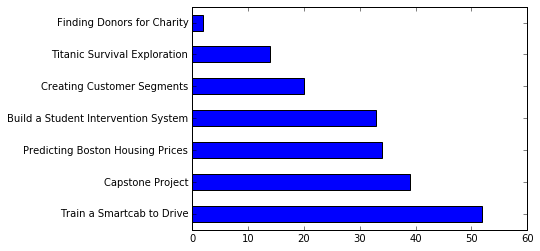

In [87]:
'''
Number of appointments by project
'''
relevant_data['Event Type Name'].value_counts().plot(kind='barh')

In [88]:
'''
Number of appointments by student
'''
relevant_data['Invitee Name'].value_counts()

Jeff Chiu                       10
Shiqi Hu                         8
jane wang                        7
Rajeev Ranjan                    6
avinash kondagunta               6
Rahul Ahuja                      5
Christine Yi                     5
Joshua Thomas                    5
Michele(Michael) Cavaioni        4
Jonathan Reyles                  3
zak goldwasser                   3
Evelina Katzi                    3
Osvaldo Castellanos              3
Weikang Duan                     2
Sreekanth kolamala               2
Robert McKee                     2
Balamurugan Raman                2
Faisal Al-Tameemi                2
Orlando Trejo                    2
Will Cenk                        2
Ekaterina Volkova-Volkmar        2
Murray Lynch                     2
venkata kalluri                  2
vidy alfredo                     2
Atir Petkar                      2
Kena shah                        2
Juanyan Li                       2
Aarju Goyal                      2
Ahmed Adel          

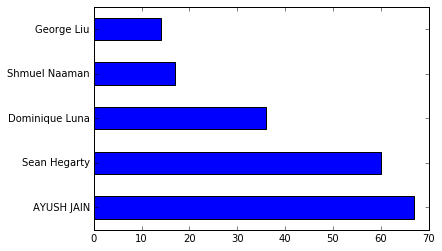

In [89]:
'''
Number of appointments by coach
'''
relevant_data['User Name'].value_counts().plot(kind='barh')

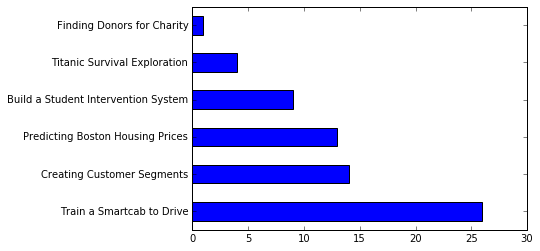

In [90]:
'''
Ayush Jain
'''
ayush = relevant_data[relevant_data['User Name'] == 'AYUSH JAIN']
ayush['Event Type Name'].value_counts().plot(kind='barh')

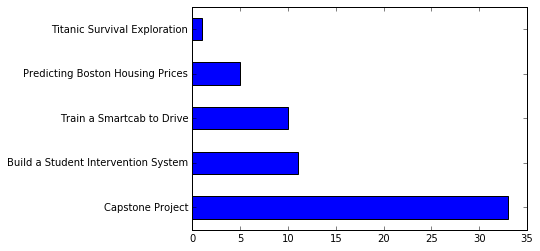

In [91]:
'''
Sean Hagerty
'''
sean = relevant_data[relevant_data['User Name'] == 'Sean Hegarty']
sean['Event Type Name'].value_counts().plot(kind='barh')

In [92]:
df = sean['Event Type Name'].value_counts()
df_sean = pd.Series.to_frame(df)
df_sean.columns = ['Sean H']
df_sean

,Sean H
Capstone Project,33
Build a Student Intervention System,11
Train a Smartcab to Drive,10
Predicting Boston Housing Prices,5
Titanic Survival Exploration,1


In [93]:
df = ayush['Event Type Name'].value_counts()
df_ayush = pd.Series.to_frame(df)
df_ayush.columns = ['Ayush J']
df_ayush

,Ayush J
Train a Smartcab to Drive,26
Creating Customer Segments,14
Predicting Boston Housing Prices,13
Build a Student Intervention System,9
Titanic Survival Exploration,4
Finding Donors for Charity,1


In [94]:
ayush_sean = df_ayush.join(df_sean, how = 'outer').fillna(0)
ayush_sean

,Ayush J,Sean H
Build a Student Intervention System,9.0,11.0
Capstone Project,0.0,33.0
Creating Customer Segments,14.0,0.0
Finding Donors for Charity,1.0,0.0
Predicting Boston Housing Prices,13.0,5.0
Titanic Survival Exploration,4.0,1.0
Train a Smartcab to Drive,26.0,10.0


In [95]:
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('adarsh108', 'zGjLFPqCsMfBaQdwZLnp')

In [96]:
dominique = relevant_data[relevant_data['User Name'] == 'Dominique Luna']
df = dominique['Event Type Name'].value_counts()
df_dominique = pd.Series.to_frame(df)
df_dominique.columns = ['Dominique L']
df_dominique

,Dominique L
Train a Smartcab to Drive,11
Predicting Boston Housing Prices,7
Capstone Project,6
Build a Student Intervention System,6
Creating Customer Segments,3
Titanic Survival Exploration,3


In [97]:
shmuel = relevant_data[relevant_data['User Name'] == 'Shmuel Naaman']
df = shmuel['Event Type Name'].value_counts()
df_shmuel = pd.Series.to_frame(df)
df_shmuel.columns = ['Shmuel N']
df_shmuel

,Shmuel N
Train a Smartcab to Drive,5
Build a Student Intervention System,5
Creating Customer Segments,3
Predicting Boston Housing Prices,2
Titanic Survival Exploration,2


In [98]:
george = relevant_data[relevant_data['User Name'] == 'George Liu']
df = george['Event Type Name'].value_counts()
df_george = pd.Series.to_frame(df)
df_george.columns = ['George L']
df_george

,George L
Predicting Boston Housing Prices,7
Titanic Survival Exploration,4
Build a Student Intervention System,2
Finding Donors for Charity,1


In [99]:
join_df = ayush_sean.join(df_dominique, how = 'outer').fillna(0)
join_df1 = join_df.join(df_shmuel, how = 'outer').fillna(0)
final = join_df1.join(df_george, how = 'outer').fillna(0)
final_df = pd.DataFrame.transpose(final)
final_df = final_df[['Titanic Survival Exploration', 'Predicting Boston Housing Prices', 
                     'Build a Student Intervention System',
                     'Finding Donors for Charity', 'Creating Customer Segments', 
                     'Train a Smartcab to Drive', 'Capstone Project'
                    ]]
final_df

,Titanic Survival Exploration,Predicting Boston Housing Prices,Build a Student Intervention System,Finding Donors for Charity,Creating Customer Segments,Train a Smartcab to Drive,Capstone Project
Ayush J,4.0,13.0,9.0,1.0,14.0,26.0,0.0
Sean H,1.0,5.0,11.0,0.0,0.0,10.0,33.0
Dominique L,3.0,7.0,6.0,0.0,3.0,11.0,6.0
Shmuel N,2.0,2.0,5.0,0.0,3.0,5.0,0.0
George L,4.0,7.0,2.0,1.0,0.0,0.0,0.0


In [100]:
trace1 = go.Bar(
    y = final_df['Titanic Survival Exploration'],
    x = final_df.index,
    name='Titanic Survival Exploration'
)
trace2 = go.Bar(
    y = final_df['Predicting Boston Housing Prices'],
    x = final_df.index,
    name='Predicting Boston Housing Prices'
)
trace3 = go.Bar(
    y = final_df['Build a Student Intervention System'],
    x = final_df.index,
    name='Build a Student Intervention System'
)
trace4 = go.Bar(
    y = final_df['Finding Donors for Charity'],
    x = final_df.index,
    name='Finding Donors for Charity'
)
trace5 = go.Bar(
    y = final_df['Creating Customer Segments'],
    x = final_df.index,
    name='Creating Customer Segments'
)
trace6 = go.Bar(
    y = final_df['Train a Smartcab to Drive'],
    x = final_df.index,
    name='Train a Smartcab to Drive'
)
trace7 = go.Bar(
    y = final_df['Capstone Project'],
    x = final_df.index,
    name='Capstone Project'
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]

layout = go.Layout(
    title = '1:1 Appointments by project',
    barmode='group',
    xaxis=dict(
        title = 'Coach',
        autotick=True,
        ticks='inside',
        tick0=0,
        dtick=0.25,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000',
        
    ),
    yaxis=dict(
        title = 'Number of appointments',
        autotick=True,
        ticks='outside',
        tick0=0,
        dtick=0.25,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    autosize=False,
    width=800,
    height=700,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor='#e5e5e5',
    plot_bgcolor='#c7c7c7',
    
)


fig = go.Figure(data=data, 
                layout=layout)
py.iplot(fig, 
         filename='grouped-bar')